In [59]:
import sys
sys.path.append('/home/lpsha/s154446/fractality/dual_grpah_algo/')

import dual_conti

from importlib import reload
reload(dual_conti)

import pandas as pd
import geopandas as gpd

from pyrosm import OSM, get_data
import osmnx as ox
import momepy

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fp = get_data('Isle of Man')
osm = OSM(fp)
_, shape_df = osm.get_network(nodes=True)
gdf_merged, H = dual_conti.get_dual_dir_con(t_buffer=5, a_threshold=30, data=shape_df)

pyrosm GeoDataFrame


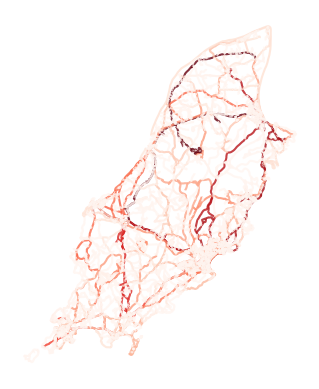

In [67]:
gdf_merged['degree_log'] = gdf_merged['degree'].apply(np.log10)
gdf_merged.plot(column='degree_log',vmin=1,cmap='Reds',alpha=0.8)
plt.axis('off')
plt.show()

In [68]:
place_name = "Isle of Man"
G = ox.graph_from_place(place_name, network_type="all")
gdf_merged_ox, H = dual_conti.get_dual_dir_con(t_buffer=5, a_threshold=30, data=G)

osmnx graph


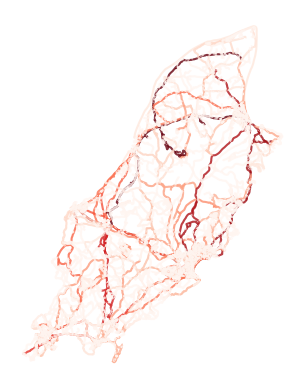

In [69]:
gdf_merged_ox['degree_log'] = gdf_merged_ox['degree'].apply(np.log10)
gdf_merged_ox.plot(column='degree_log',vmin=1,cmap='Reds',alpha=0.8)
plt.axis('off')
plt.show()